Create an ipython notebook to provide a tutorial showing the steps to perform dimensional reduction using https://www.codementor.io/jadianes/data-science-python-pandas-r-dimensionality-reduction-du1081aka as the basis and a dataset of your choosing :
Your tutorial will  include

1. a short description of what is the dimensionality of the data and why and how to pick the dimensions for use

2, Initial Data setup

3. Dimensional reduction process

4. Display in graph and plots

5. Discussion of the images in the graphs and plots

6. Bibliography ( urls and names of pages and authors of used code and descriptions )  Be sure to put in 

  You should submit your ipython notebook url in your github account or zip your homework9 directory and  submit it.

Be sure that if someone downloads your directory the notebook will run as shown.  So any scripts or images used in the notebook

are local to the directory of the notebook.  You must have citations and references marked in the text.  You can use http://www.citationmachine.net  to help standardize your references at the end of you document

For more credit continue with the cluster analysis of the dimensionally reduced code

## 1. Dimensional reduction process

#### Dimesionality reduction is all about discovering non-linear, non-local relationships in data that  are not obvious in the original feature space.  If we reduce some dimension in the data we can visualize it because a projection in 2D/3D space can be plotted easily. Training a model on a dataset with many dimensions usually7 requires vast time and space complexity.  Not all the features that are available in the dataset are relavant to our problem. If we reduce the dimensions we can reduce the unnecessary parts of the data. So, once we have a small data we can easily apply the algorithms on them.  

#### Dimesionaly reduction can be divided into two different features. 
1. Feature Selection  :  Finding the most relevant features of a problem is feature selection
2. feature Extraction : Finding new features after transforming the data  from a high dimensional space to lower dimensional space possible. 

Now I am going to use the PCA(Personal component analysis) which is one of the Feature extraction algorithm.

## 2. Initial data setup

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import seaborn as sns
from sklearn import datasets
import matplotlib.pyplot as plt

Firstly, I imported the data from sklearn and prepared a dataframe for performing analysis on it

In [25]:
breast_cancer_data=datasets.load_breast_cancer()
df = pd.DataFrame(breast_cancer_data.data,columns=breast_cancer_data.feature_names)
df.head(10)     


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


Here I tried to slice the predictor features. I sliced the radius, texture from the dataset

In [27]:
X=df.iloc[:,2:32]
print(type(X))
# displaying the first five rows of X
X.head()

<class 'pandas.core.frame.DataFrame'>


,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### Identifying Collinearity

To identify the variables with more than 85% correlation we can get the covariance matrix from the code below. Here, 85% is the threshold value chosen by us, it can be any value.

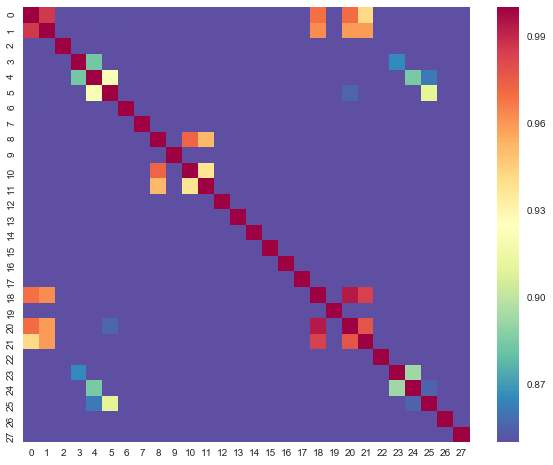

In [16]:
cor=np.corrcoef(X.T)
type(cor)
%matplotlib inline
plt.figure(figsize=(10, 8))
sns.heatmap(cor, vmin=0.85,vmax=1,\
            cmap=plt.cm.Spectral_r)
#cmap='coolwarm'#

From the above plot, we can observe the features that are highly correlated. 

1. Feature 0,2,3,20,22,23 are highly correlated. Logically, perimeter and area are computed from radius. Therefore, we keep radius and discard perimeter and area.
2. Feature 10, 12, 13  are highly correlated to each other so we keep feature 10 and leave the rest.

### Dimensionality reduction using Principle component analysis (PCA)

PCA is a technique that extracts valuable set of predictor features/variables by the linear combination of original p predictors in a dataset. These new predictors has the capability of capturing 95% or more of the variance in original data. 

In [17]:
from sklearn.decomposition import PCA
pca=PCA(n_components=10)
x_pca=pca.fit_transform(X)
print (x_pca.shape)
print(pca.explained_variance_ratio_) 
print (pca.explained_variance_ratio_.sum())
loadings = pca.components_

(569L, 10L)
[  9.82081720e-01   1.61760674e-02   1.55731872e-03   1.11690228e-04
   6.54079071e-05   6.34979544e-06   8.41926150e-07   3.05493182e-07
   2.16746194e-07   6.02901200e-08]
0.999999978676


From the first component itself we can say that the result shows more than 95% of the variance in the data. This happens in cases where there is high collinearity. This ultimately influence prediction results if such data is used. Since the PCA is performed on the unscaled data, only one component in the result shows almost all the variance in the data.

### PCA on standardized data

If the features have very high difference in the variances then the points in the clusters are more likely to be separated.The breast cancer data has different variances which needs to be standardized. Standardscalar here helps in standardizing the data points by removing the mean and scaling each point to unit variance.


Standardization centeres the features around a mean of zero. 

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled=scaler.fit_transform(X)

In [19]:

pca=PCA(n_components=0.95)
x_pca=pca.fit_transform(X_scaled)
print (x_pca.shape)
print(pca.explained_variance_ratio_) 
print (pca.explained_variance_ratio_.sum())
loadings = pca.components_

(569L, 10L)
[ 0.44808673  0.1904235   0.10041682  0.05893816  0.04677221  0.04280972
  0.02373909  0.01675158  0.01386227  0.01191153]
0.953711608295


 10 components explain 95% of the variance in the data compared to just 1 when applying PCA on the unscaled data.
 
 From this, we can conclude that PCA with out scaling can hide features with smaller magnitude which are usable to the prediction.
 
 We can further see how removing collinear features from the scaled can affect PCA here below.


#### PCA after removing collinear variables

As discussed above while identifying the collinearity, removing area, perimeter,perimeter_worst, area_worst, perimeter_se, area_se  ( columns: 2,3,12,13,22,23,) from the original data using PCA is shown below 

In [20]:

X_scaled=pd.DataFrame(X_scaled)
xx=X_scaled.drop(X_scaled.columns[[2, 3, 22, 23, 12, 13]], axis=1) 
pca=PCA(n_components=0.95)
x_pca=pca.fit_transform(xx)
print (x_pca.shape)
print(pca.explained_variance_ratio_) 
print (pca.explained_variance_ratio_.sum())
loadings = pca.components_

(569L, 8L)
[ 0.47586429  0.19150542  0.09617026  0.06325991  0.05706094  0.032917
  0.01904595  0.01631457]
0.952138342211


## Variance Plots

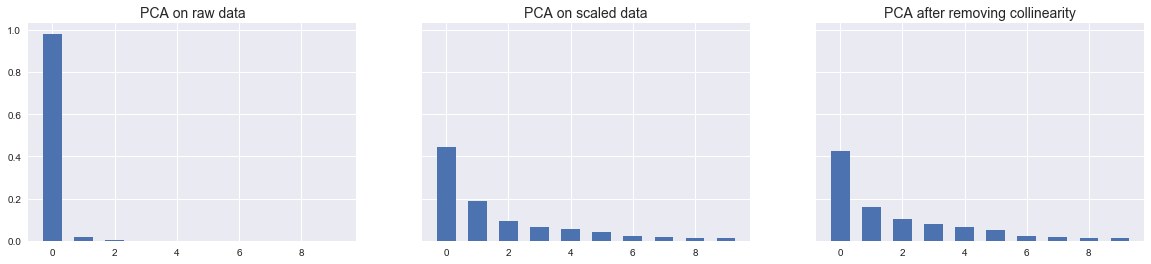

In [21]:
import matplotlib.pyplot as plt

n=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10']
index = np.arange (10)

var_1=np.array([9.82044672e-01,1.61764899e-02,1.55751075e-03,1.20931964e-04,8.82724536e-05,6.64883951e-06,4.01713682e-06,8.22017197e-07,3.44135279e-07,1.86018721e-07])                
var_sc=np.array([0.44272026,0.18971182,0.09393163,0.06602135,0.05495768,0.04024522,0.02250734,0.01588724,0.01389649,0.01168978])
var_sc_coll=np.array([0.42661046,0.15932139,0.10294428,0.07788731,0.06489774,0.05015242,0.02145044,0.0187846,0.01505759,0.01197751])
var=np.vstack([var_1,var_sc,var_sc_coll]).T

# creating pandas datframe from numpy array 'var'
df=pd.DataFrame(var,index=n,columns=['original','scaled','scaled_no_colli'])

# plotting variance data 
%matplotlib inline
fig, ax= plt.subplots(1,3,sharey=True,figsize=(20,4))
r1 = ax[0].bar(index,df['original'],width = 0.6,align='center')
ax[0].set_title('PCA on raw data',fontsize=14)

r2 = ax[1].bar(index,df['scaled'],width = 0.6,align='center')
ax[1].set_title('PCA on scaled data',fontsize=14)

r3 = ax[2].bar(index,df['scaled_no_colli'],width= 0.6,align='center')
#ax[2].set_xticklabels(n)
ax[2].set_title('PCA after removing collinearity',fontsize=14)

From the above plots we can observe that, stanrdizing the data and using PCA on the scaaled data has improved quite well in capturing variance of the raw data.

Removing collinear features allowed the variance from other variables which were previously ignored to be captured by PCA.

## Bibiography

"Dimensionality reduction." Wikipedia. December 06, 2017. Accessed December 10, 2017. https://en.wikipedia.org/wiki/Dimensionality_reduction. 


https://www.analyticsvidhya.com/blog/2015/07/dimension-reduction-methods/

http://www.statsblogs.com/2013/11/09/multicollinearity-and-collinearity-in-multiple-regression-a-tutorial/

https://shiring.github.io/machine_learning/2017/01/15/rfe_ga_post